<a href="https://colab.research.google.com/github/fourdozen/galaxy-classification/blob/main/galaxy_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Classification of Galaxy Morphology

Astronomers classify galaxies based on their visual appearance and the presence of certain features, and their shape. The most popular classification scheme is the [Hubble Classification Scheme](https://en.wikipedia.org/wiki/Hubble_sequence#/media/File:Hubble_Tuning_Fork_diagram.svg).

There are three broad categories of galaxy: Spirals, Lenticulars and Ellpticals. Also there are irregular galaxies which do not fit into the Hubble Classification Scheme. On a subordinate level, galaxies may or may not features such as spiral arms, bulges, bars. The apperance of a galaxy is also changed by its apparent inclination, varying between being "face-on" and "edge-on".

We aim to classify galaxies based on their broader shape and their finer features.

The dataset used is the Galaxy Zoo Challenge: https://www.kaggle.com/datasets/robertmifsud/resized-reduced-gz2-images/data



### Relevant Papers

1. [Galaxy Zoo 2: detailed morphological classifications for 304 122 galaxies from the Sloan Digital Sky Survey](https://arxiv.org/abs/1308.3496)
2. [Machine and Deep Learning Applied to Galaxy Morphology - A Comparative Study](https://arxiv.org/abs/1901.07047#:~:text=In%20all%20of%20our%20samples,art%20morphological%20classification%20from%20literature.)
3. [A CATALOG OF DETAILED VISUAL MORPHOLOGICAL CLASSIFICATIONS FOR 14,034 GALAXIES IN THE SLOAN DIGITAL SKY SURVEY](https://iopscience.iop.org/article/10.1088/0067-0049/186/2/427#artAbst)
4. [Morphological classification of galaxies with deep learning: comparing 3-way and 4-way CNNs](https://arxiv.org/pdf/2106.01571.pdf)
5. [Galaxy Zoo: reproducing galaxy morphologies via machine learning](https://watermark.silverchair.com/mnras0406-0342.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA2YwggNiBgkqhkiG9w0BBwagggNTMIIDTwIBADCCA0gGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMptErBk7B898VUvBkAgEQgIIDGePzohyAdS54Ee9cavgr6keVq1C4p7KdsS3HfNytS6S1sSUYwA7nmKp2d4rC0uKiEisJPddueN9w4LHDtQy1zjKD0Ipvca-_vuo3Gjbt5Va9Tdl_tdAnej454G_MYNpiQmAgiWN-P4TcqWoMf2XZv-XVOXMyJr76XFqHHPX766Tj7uaqu4zTK1iC8ajaYfu8_haWlk0jngHz4syemxropq0NLgun8xt4FVcdAdPPJzojr0xRk_mYewUxw8MzqSn_6PiwAshfzZZcqaXppvJix-6Vfqyya-HBI4BEP1sX_qcPECVlJGoRU714OGnoLL0KWyk9h4axSY_S_LxKgyGyhC-7jWmYGCVAcIY4ogBZhkvlTOGtuGXUrqazMV6jLwg7ooNQKzD4f76WrdHooggTCldpII7epqx9HZuWhtbvHg7XXp9LrMkVsyNA0PbRLVw7SBwJ4IMYpeG1x-AM94e0-4AhdyUD2sxrsRG2PXEWvoJbbmz7aEIZ-8a2Bu5tHgO31v3Lc2Bx2GHriDDP535AebRS2TTujeES9NXeYgGvEXweR1UmocCVho4B2Y2iW-6rAKcKq5tikKSpLdXeph5iQl_qeqMV5T3b2aLBvpQdwwBE7-dCh8GfLBNKJO0UYJ5QSMtTEPSqdu3KGaNX4veEFVGDz_z4BSvqsW78S45h5_NPhEwhoDSeisyHue1HDHe25x47S0RXiofNZtGRSptFcRU1r9DbdPfWLmyd4IU7exWlLy6NOP9Hdq66KpADpeO744Oez2Xb5XZaK3q4oot3Cr1mkUho8OS386JYp3uTp3GWiTnUYkMy3IV1_0z4GlNpdXxaU2GqU-BXJPm1xeW4jky8NVyn8PvoPPEE4Rx0O0Ywci6G-Hu-8-M3ozn8G7gBmaMOeT2Bhyv81FkJymJvNIqdzKqTpF0xmcKiRFVkwOVFtdDSPLHEfgwj1flInWgxRcFkM7u6PUCvoriWthVnlZsaW_F2TcDXg2m3oCyCiqNqYN4e2DrD1w8XFERa9GBNz9IAFLb3MbB7ynn3TAsdz_WKC75knusZRSI)
6. [Galaxy Classification Using Transfer Learning and Ensemble of CNNs With Multiple Colour Spaces](https://arxiv.org/pdf/2305.00002.pdf)
7. [Rotation-invariant convolutional neural networks for galaxy morphology prediction](https://academic.oup.com/mnras/article/450/2/1441/979677#16977233)

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

### Galaxy Zoo 2 Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fourdozen","key":"d95701b4f4481237eb241e1bf7747208"}'}

In [ ]:
# !pip install kaggle -U

In [3]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download robertmifsud/resized-reduced-gz2-images -q
!unzip -q resized-reduced-gz2-images.zip

### First Look at Data

In [6]:
df = pd.read_csv('3class_map_a(p).csv')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(10)

,dr7objid,asset_id,gz2class,total_classifications,total_votes,agreement
0,587732591714893851,58957,Sc+t,45,342,1.000000
1,588009368545984617,193641,Sb+t,42,332,1.000000
2,587732484359913515,55934,Ei,36,125,0.384527
3,587741723357282317,158501,Sc+t,28,218,0.766954
4,587738410866966577,110939,Er,43,151,0.399222
5,587729751132209314,249897,Ei,48,154,0.532355
6,587733608555216981,71801,Ei,39,142,0.235888
7,587735742617616406,87614,Sb+t,35,282,1.000000
8,587738574068908121,113304,Ei,50,158,0.503446
9,587731870708596837,47197,Sb?t,43,275,0.071405


In [7]:
def read_data(agreement_threshold = 0.5):
    df = pd.read_csv('3class_map_a(p).csv')
    df.drop(["Unnamed: 0", "total_classifications", "total_votes"], axis=1, inplace=True)
    return df[df["agreement"] > agreement_threshold]

In [8]:
import os

In [9]:
IMAGES_PATH = '/content/images_E_S_SB_299x299_a_03/images_E_S_SB_299x299_a_03_train'

In [10]:
def create_class_dataframe(folder_path):
    folders = [f for f in os.listdir(folder_path)]
    images = []
    paths = []
    classes = []
    for cat in folders:
        for image in os.listdir(os.path.join(folder_path, cat)):
            image_path = os.path.join(folder_path, cat, image)
            if os.path.isfile(image_path):
                images.append(image.replace('.jpg', ''))
                paths.append(image_path)
                classes.append(cat)
    classes_dict = {"Image": images, "Path": paths,"Class": classes}
    return pd.DataFrame.from_dict(classes_dict)

In [11]:
df = create_class_dataframe(IMAGES_PATH)
df = df.sample(frac=1).reset_index(drop=True) # shuffle rows
df.count()

Image    120432
Path     120432
Class    120432
dtype: int64

In [12]:
df.head(10)

,Image,Path,Class
0,108956,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
1,136087,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
2,208440,/content/images_E_S_SB_299x299_a_03/images_E_S...,S
3,208333,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
4,60742,/content/images_E_S_SB_299x299_a_03/images_E_S...,S
5,140442,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
6,88527,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
7,206045,/content/images_E_S_SB_299x299_a_03/images_E_S...,SB
8,44267,/content/images_E_S_SB_299x299_a_03/images_E_S...,E
9,96079,/content/images_E_S_SB_299x299_a_03/images_E_S...,S


In [13]:
df['Image'].nunique()

120432

Note that all image file naems are unique. We have 120432 images.

### Data Exploaration

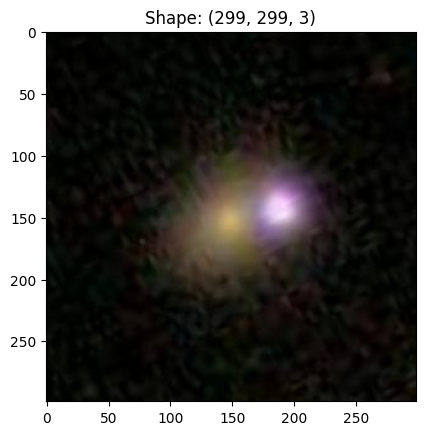

In [14]:
first_image_path = df.iloc[0]["Path"]
sample_image = tf.io.read_file(first_image_path)
sample_image = tf.io.decode_image(sample_image)
plt.imshow(sample_image)
IMG_SHAPE = np.shape(sample_image)
plt.title(f'Shape: {IMG_SHAPE}')
plt.show()

In [15]:
def get_image(full_path):
    image = tf.io.read_file(full_path)
    image = tf.io.decode_image(image)
    return image

In [16]:
def display_galaxy(filename):
    sample_image = get_image(filename)
    plt.imshow(sample_image)
    plt.title(f'Shape: {np.shape(sample_image)}')
    plt.show()


In [17]:
row = df[df['Path'] == '/content/images_E_S_SB_299x299_a_03/images_E_S_SB_299x299_a_03_train/E/214055.jpg']
row = row.values[0]
row[2]

'E'

In [18]:
import random
import math

In [19]:
def display_random_galaxies(df, seed, n=10):
    random.seed(seed)
    training_images = list(df["Path"])
    random_images = random.sample(training_images, n)
    grid_size = (math.ceil(n/5), 5)
    fig, axs = plt.subplots(grid_size[0], grid_size[1], figsize=(20, grid_size[0]*4))
    axs = np.array(axs).flatten()
    for i, ax in enumerate(axs):
        img = get_image(random_images[i])
        ax.imshow(img)
        row = df[df['Path'] == random_images[i]]
        row = row.values[0]
        ax.set_title(f"Title: {row[0]}, Class: {row[2]}")
    plt.show()


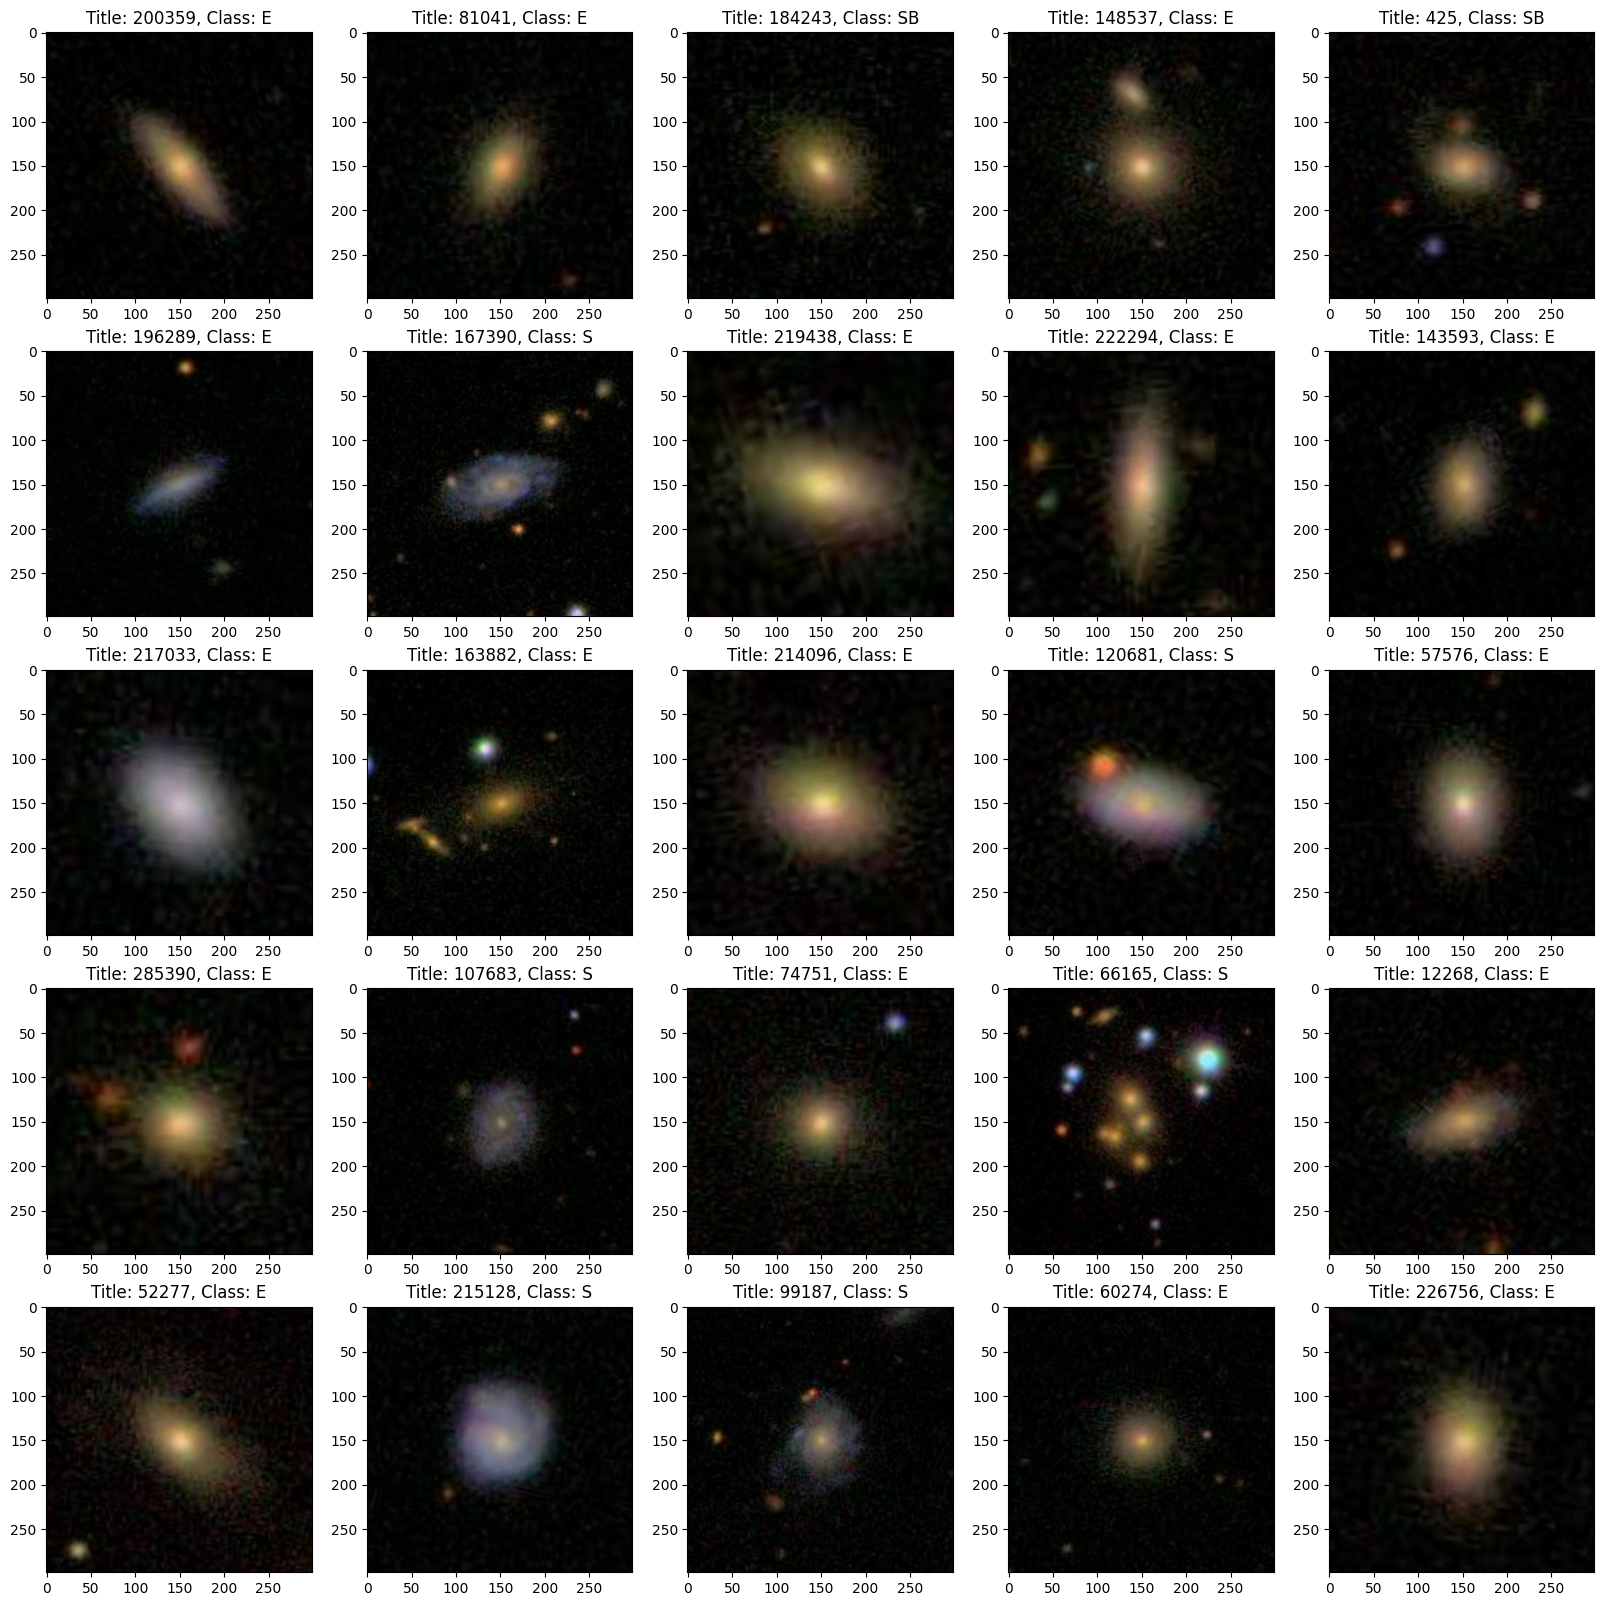

In [20]:
display_random_galaxies(df, 6, 25)

We want One-hot-encode the classes in the dataset.

In [21]:
df_unencoded = df
df = pd.get_dummies(df_unencoded, columns=['Class'])
df.head(10)

,Image,Path,Class_E,Class_S,Class_SB
0,108956,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
1,136087,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
2,208440,/content/images_E_S_SB_299x299_a_03/images_E_S...,0,1,0
3,208333,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
4,60742,/content/images_E_S_SB_299x299_a_03/images_E_S...,0,1,0
5,140442,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
6,88527,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
7,206045,/content/images_E_S_SB_299x299_a_03/images_E_S...,0,0,1
8,44267,/content/images_E_S_SB_299x299_a_03/images_E_S...,1,0,0
9,96079,/content/images_E_S_SB_299x299_a_03/images_E_S...,0,1,0


How many images are there in the dataset?


In [22]:
class_totals = df[['Class_E', 'Class_S', 'Class_SB']].sum()
class_totals

Class_E     81547
Class_S     29908
Class_SB     8977
dtype: int64

In total we have:

In [23]:
class_totals.sum()

120432

In [24]:
num_classes = len(df.drop(['Image', 'Path'], axis = 1, inplace = False).columns)
num_classes

3

### Create Dataset

In [25]:
def load_image(file_name):
    raw = tf.io.read_file(file_name)
    tensor = tf.io.decode_image(raw)
    tensor = tf.cast(tensor, tf.float32)
    tensor = tf.reshape(tensor, IMG_SHAPE)
    return tensor

def create_dataset(file_names, labels):
    dataset = tf.data.Dataset.from_tensor_slices((file_names, labels))
    dataset = dataset.map(lambda file_name, label: (load_image(file_name), tf.convert_to_tensor(label)))
    return dataset

Split training images into training and validation datasets. This is done at this stage by creating two separate datasets.

We use 90:10 ratio for test:validation data:

In [26]:
file_paths = df['Path'].to_numpy()
labels = df[['Class_E','Class_S','Class_SB']].to_numpy()
train_split = 0.9

In [27]:
from sklearn.model_selection import train_test_split

train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, train_size=train_split)

In [28]:
train_set = create_dataset(train_paths, train_labels)
val_set = create_dataset(val_paths, val_labels)

In [29]:
print(next(iter(val_set)))

(<tf.Tensor: shape=(299, 299, 3), dtype=float32, numpy=
array([[[10., 10.,  8.],
        [ 6.,  6.,  4.],
        [ 3.,  3.,  1.],
        ...,
        [ 5.,  4.,  2.],
        [ 3.,  2.,  0.],
        [ 1.,  0.,  0.]],

       [[11., 11.,  9.],
        [ 7.,  7.,  5.],
        [ 3.,  3.,  1.],
        ...,
        [ 6.,  5.,  3.],
        [ 4.,  3.,  1.],
        [ 3.,  2.,  0.]],

       [[13., 13., 11.],
        [ 9.,  9.,  7.],
        [ 4.,  4.,  2.],
        ...,
        [ 7.,  6.,  4.],
        [ 6.,  5.,  3.],
        [ 5.,  4.,  2.]],

       ...,

       [[ 6.,  5.,  3.],
        [ 3.,  2.,  0.],
        [ 4.,  3.,  1.],
        ...,
        [ 5.,  4.,  0.],
        [ 6.,  5.,  1.],
        [ 6.,  5.,  1.]],

       [[ 7.,  6.,  4.],
        [ 3.,  2.,  0.],
        [ 3.,  2.,  0.],
        ...,
        [ 4.,  3.,  0.],
        [ 5.,  4.,  0.],
        [ 6.,  5.,  1.]],

       [[ 8.,  7.,  5.],
        [ 3.,  2.,  0.],
        [ 2.,  1.,  0.],
        ...,
        [ 3.,  2.,

In [30]:
tf.shape(load_image(first_image_path))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([299, 299,   3], dtype=int32)>

### Data Augmentation

We want to perform some data augmentation, to artificially increase the size of our dataset and reduce overfitting.

The following data augmentation steps are taken:

Stage 1:
1. Centre crop from 299 pixel square to 207 pixels to remove excess space around the image.
2. Rescale the data from [0, 255] to [0, 1].

Stage 2:
1. Random Traslation by between up, down, left, right or none by a random number of pixels. Yields 5 images.
2. Random Scaling between 1.3 and 1/1.3
3. Random Rotation by (0, 90, 180, 270) degrees.
4. Flipping along y=x. Yields 2 images.

In [31]:
from tensorflow.keras import layers

In [32]:
transf_1 = 207

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomTranslation(0.2, 0.2, fill_mode="constant", fill_value = 0),
    layers.RandomRotation(0.25, fill_mode="constant", fill_value = 0),
    layers.CenterCrop(transf_1, transf_1),
    layers.Rescaling(1./255)
])

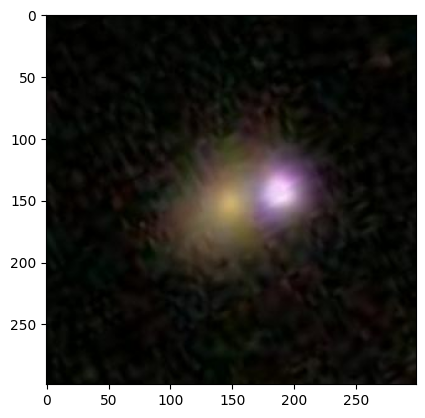

In [34]:
plt.imshow(sample_image)

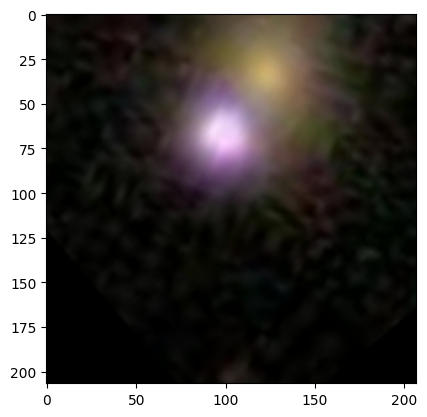

In [35]:
result = data_augmentation(sample_image)
plt.imshow(result)

In [36]:
tf.shape(result)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([207, 207,   3], dtype=int32)>

### Model creation

### Create validation data

validation:training split is 0.1:0.9

In [37]:
model_1 = tf.keras.models.Sequential([
    layers.Input(shape = IMG_SHAPE),
    data_augmentation,
    # CNN Layers
    layers.Conv2D(32, 7,  padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(64, 5, padding='same', activation='relu'),
    layers.Conv2D(64, 5, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

In [73]:
model_alexnet = tf.keras.models.Sequential([
    layers.Input(shape = IMG_SHAPE),
    # Data Augmentation Layers
    data_augmentation,
    # CNN Layers
    layers.Conv2D(96, 11,  padding='valid', activation='relu', strides=(4, 4)),
    layers.MaxPool2D(pool_size=(3, 3), padding='valid', strides=(2, 2)),
    layers.Conv2D(256, 5,  padding='same', activation='relu', strides=(1, 1)),
    layers.MaxPool2D(pool_size=(3, 3), padding='valid', strides=(2, 2)),
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(384, 3, padding='same', activation='relu'),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3, 3), padding='valid',strides=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax'),
])

In [68]:
from tensorflow.keras.optimizers import Adam

def compile_model(model):
    model.compile(
        optimizer=Adam(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy'],
        )

In [69]:
model_list = [model_1, model_alexnet]
for model in model_list:
    compile_model(model)

In [60]:
BATCH_SIZE = 32
callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [61]:
model_1.fit(train_set.batch(BATCH_SIZE), epochs=100, verbose=1, validation_data = val_set.batch(BATCH_SIZE), callbacks=callback_es)

Epoch 1/100
3388/3388 [==============================] - 78s 23ms/step - loss: 0.5188 - accuracy: 0.8050 - val_loss: 0.4962 - val_accuracy: 0.8143
Epoch 2/100
3388/3388 [==============================] - 76s 22ms/step - loss: 0.4973 - accuracy: 0.8122 - val_loss: 0.4890 - val_accuracy: 0.8183
Epoch 3/100
3388/3388 [==============================] - 76s 22ms/step - loss: 0.4873 - accuracy: 0.8162 - val_loss: 0.4891 - val_accuracy: 0.8208
Epoch 4/100
3388/3388 [==============================] - 76s 23ms/step - loss: 0.4833 - accuracy: 0.8180 - val_loss: 0.4713 - val_accuracy: 0.8248
Epoch 5/100
3388/3388 [==============================] - 76s 23ms/step - loss: 0.4801 - accuracy: 0.8192 - val_loss: 0.4460 - val_accuracy: 0.8366
Epoch 6/100
3388/3388 [==============================] - 76s 22ms/step - loss: 0.4731 - accuracy: 0.8228 - val_loss: 0.4575 - val_accuracy: 0.8323
Epoch 7/100
3388/3388 [==============================] - 76s 22ms/step - loss: 0.4675 - accuracy: 0.8244 - val_loss: 0

In [71]:
model_alexnet.compile(
        optimizer=Adam(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy'],
        )

In [74]:
model_alexnet.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (207, 207, 3)             0         
                                                                 
 conv2d_40 (Conv2D)          (None, 50, 50, 96)        34944     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 24, 24, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 24, 24, 256)       614656    
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 11, 11, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 11, 11, 384)      

In [72]:
model_alexnet.fit(train_set.batch(BATCH_SIZE), epochs=100, verbose=1, validation_data = val_set.batch(BATCH_SIZE), callbacks=callback_es)

Epoch 1/100
3388/3388 [==============================] - 53s 14ms/step - loss: 0.7063 - accuracy: 0.7260 - val_loss: 0.6509 - val_accuracy: 0.7573
Epoch 2/100
3388/3388 [==============================] - 48s 14ms/step - loss: 0.6654 - accuracy: 0.7489 - val_loss: 0.6498 - val_accuracy: 0.7591
Epoch 3/100
3388/3388 [==============================] - 47s 14ms/step - loss: 0.6455 - accuracy: 0.7578 - val_loss: 0.6230 - val_accuracy: 0.7691
Epoch 4/100
3388/3388 [==============================] - 47s 14ms/step - loss: 0.6211 - accuracy: 0.7654 - val_loss: 0.5843 - val_accuracy: 0.7784
Epoch 5/100
3388/3388 [==============================] - 47s 14ms/step - loss: 0.5962 - accuracy: 0.7715 - val_loss: 0.5742 - val_accuracy: 0.7878
Epoch 6/100
3388/3388 [==============================] - 47s 14ms/step - loss: 0.5832 - accuracy: 0.7769 - val_loss: 0.5848 - val_accuracy: 0.7796
Epoch 7/100
3388/3388 [==============================] - 47s 14ms/step - loss: 0.5689 - accuracy: 0.7818 - val_loss: 0